In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-buyers/bike_buyers_clean.csv
/kaggle/input/bike-buyers/bike_buyers.csv


# Importing Data

In [2]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Summary of the columns.
def columns_summary(df):
  for i in df.columns:
    print("Column: ",i)
    print(df[i].describe())
    print(f"Null count: {df[i].isnull().sum()}\nNull percentage: {round((df[i].isnull().sum()/len(df[i].index))*100,2)}")
    for i in range(0,2):
      print("------------")

In [4]:
data=pd.read_csv('../input/bike-buyers/bike_buyers.csv')

In [5]:
f'shape: {data.shape} Size: {data.size}'

'shape: (1000, 13) Size: 13000'

In [6]:
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [7]:
data.tail()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No
999,12121,Single,Male,60000.0,3.0,High School,Professional,Yes,2.0,10+ Miles,North America,53.0,Yes


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [9]:
len(data.columns),data.columns

(13,
 Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
        'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
        'Purchased Bike'],
       dtype='object'))

In [10]:
columns_summary(data)

Column:  ID
count     1000.000000
mean     19965.992000
std       5347.333948
min      11000.000000
25%      15290.750000
50%      19744.000000
75%      24470.750000
max      29447.000000
Name: ID, dtype: float64
Null count: 0
Null percentage: 0.0
------------
------------
Column:  Marital Status
count         993
unique          2
top       Married
freq          535
Name: Marital Status, dtype: object
Null count: 7
Null percentage: 0.7
------------
------------
Column:  Gender
count      989
unique       2
top       Male
freq       500
Name: Gender, dtype: object
Null count: 11
Null percentage: 1.1
------------
------------
Column:  Income
count       994.000000
mean      56267.605634
std       31067.817462
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64
Null count: 6
Null percentage: 0.6
------------
------------
Column:  Children
count    992.000000
mean       1.910282
std        1.626910

# Approach 1

- Imputing mean for numerical
- Imputing Mode for Categorical

In [11]:
#Function to preprocess data
def Fill_Missing_Value(df):
    ind=0
    mean = 0
    for i in df.dtypes:
    
    #Converting numbers
        if i == 'float64' or i == 'int64':
            column_name=df.columns[ind]
            print(f'index No: {ind} Column: {column_name} \nType: {i}')
            print("null",(df[column_name].isnull().sum()/len(df[column_name].index))*100,'Null sum',df[column_name].isnull().sum())
            
            column_value=df[column_name][0:]
            mean= column_value.mean()
            print(f"mean of column {column_name}: {mean}")
            
            df[column_name] = df[column_name].fillna(mean)
            print(df[column_name])
            print("After processing \nnull",(df[column_name].isnull().sum()/len(df[column_name].index))*100,'Null sum',df[column_name].isnull().sum())
            
            for i in range(0,2):
                print("------------")

        #Converting Objects
        if i == 'object'or i=='o':
            column_name=df.columns[ind]
            print(f'index No: {ind} Column: {column_name} \nType: {i}')
            print("null",(df[column_name].isnull().sum()/len(df[column_name].index))*100,'Null sum',df[column_name].isnull().sum())
            
            column_value=df[column_name][0:]
            mode= column_value.mode().values[0]
            print(f"mode of column {column_name}: {mode}")
            
            df[column_name] = df[column_name].fillna(mode,inplace=False)
            print(df[column_name])
            print("After processing \nnull",(df[column_name].isnull().sum()/len(df[column_name].index))*100,'Null sum',df[column_name].isnull().sum())
            
            for i in range(0,2):
                print("------------")
        
        ind+=1

    return df


In [12]:
#Cleaned Data
data_c=Fill_Missing_Value(data)

index No: 0 Column: ID 
Type: int64
null 0.0 Null sum 0
mean of column ID: 19965.992
0      12496
1      24107
2      14177
3      24381
4      25597
       ...  
995    23731
996    28672
997    11809
998    19664
999    12121
Name: ID, Length: 1000, dtype: int64
After processing 
null 0.0 Null sum 0
------------
------------
index No: 1 Column: Marital Status 
Type: object
null 0.7000000000000001 Null sum 7
mode of column Marital Status: Married
0      Married
1      Married
2      Married
3       Single
4       Single
        ...   
995    Married
996     Single
997    Married
998     Single
999     Single
Name: Marital Status, Length: 1000, dtype: object
After processing 
null 0.0 Null sum 0
------------
------------
index No: 2 Column: Gender 
Type: object
null 1.0999999999999999 Null sum 11
mode of column Gender: Male
0      Female
1        Male
2        Male
3        Male
4        Male
        ...  
995      Male
996      Male
997      Male
998      Male
999      Male
Name: Gend

In [13]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    1000 non-null   object 
 2   Gender            1000 non-null   object 
 3   Income            1000 non-null   float64
 4   Children          1000 non-null   float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        1000 non-null   object 
 8   Cars              1000 non-null   float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               1000 non-null   float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [14]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()
data_c['Purchased Bike']=le.fit_transform(data_c['Purchased Bike'])

In [16]:
data_c.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,0
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,0
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,0
3,24381,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,1
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,1


# Exploring Data


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data_c.describe()

,ID,Income,Children,Cars,Age,Purchased Bike
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452,0.481000
std,5347.333948,30974.380206,1.620383,1.116691,11.316422,0.499889
min,11000.000000,10000.000000,0.000000,0.000000,25.000000,0.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000,0.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000,0.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000,1.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000,1.000000


In [19]:
data_c.corr()

,ID,Income,Children,Cars,Age,Purchased Bike
ID,1.000000,-0.074879,-0.028591,0.021949,-0.054112,0.056357
Income,-0.074879,1.000000,0.258783,0.434591,0.170355,0.046734
Children,-0.028591,0.258783,1.000000,0.276667,0.525962,-0.121360
Cars,0.021949,0.434591,0.276667,1.000000,0.184267,-0.199190
Age,-0.054112,0.170355,0.525962,0.184267,1.000000,-0.106445
Purchased Bike,0.056357,0.046734,-0.121360,-0.199190,-0.106445,1.000000


<AxesSubplot:>

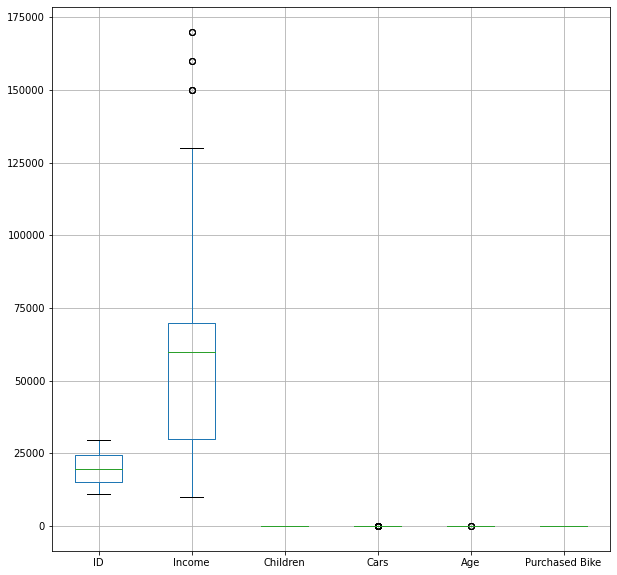

In [20]:
plt.Figure(figsize=(10,10))
pd.plotting.boxplot(data_c,figsize=(10,10))

## Box Plot with outlier values

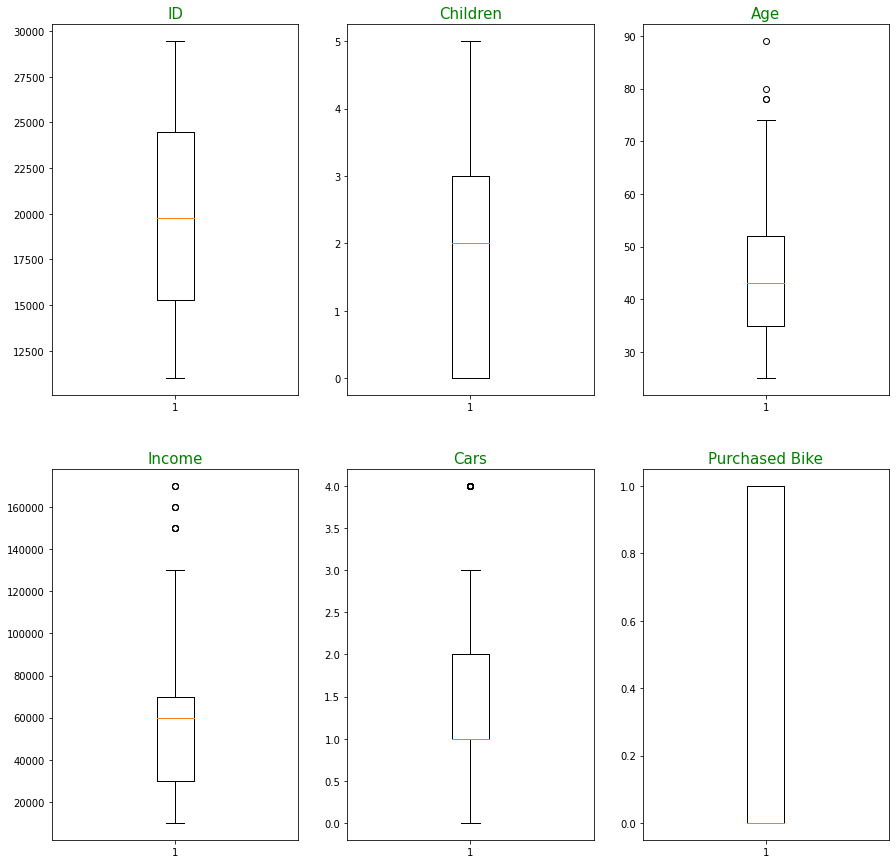

In [21]:

col=3 #Number of columns
row=2 #Number of rows

fig,ax=plt.subplots(row,col,figsize=(15,15))
r=ax.shape[0]
c=ax.shape[1]
fig.set_edgecolor('yellow')
out={} 
r1,c1=0,0
for i,j in enumerate(data_c.columns):
    
    if data_c[j].dtype!='object':
        box=ax[r1,c1].boxplot(data_c[j])
        ax[r1,c1].set_title(j,color='green',fontsize=15)
        
        out[j]=[item.get_ydata() for item in box['fliers']]
#         ax[r1,c1].set_facecolor('pink')
        r1+=1
        if r1==2:
            r1=0
            c1+=1

plt.show()
    

In [22]:
out

{'ID': [array([], dtype=int64)],
 'Income': [array([160000., 170000., 170000., 150000., 160000., 150000., 160000.,
         150000., 170000., 150000.])],
 'Children': [array([], dtype=float64)],
 'Cars': [array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 4., 4., 4., 4., 4., 4.])],
 'Age': [array([78., 89., 80., 78.])],
 'Purchased Bike': [array([], dtype=int64)]}

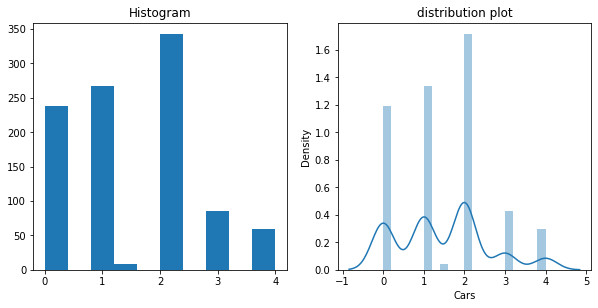

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(data_c['Cars'])
plt.title('Histogram')
plt.subplot(2,2,2)
sns.distplot(data_c['Cars'],)
plt.title('distribution plot')

plt.show()

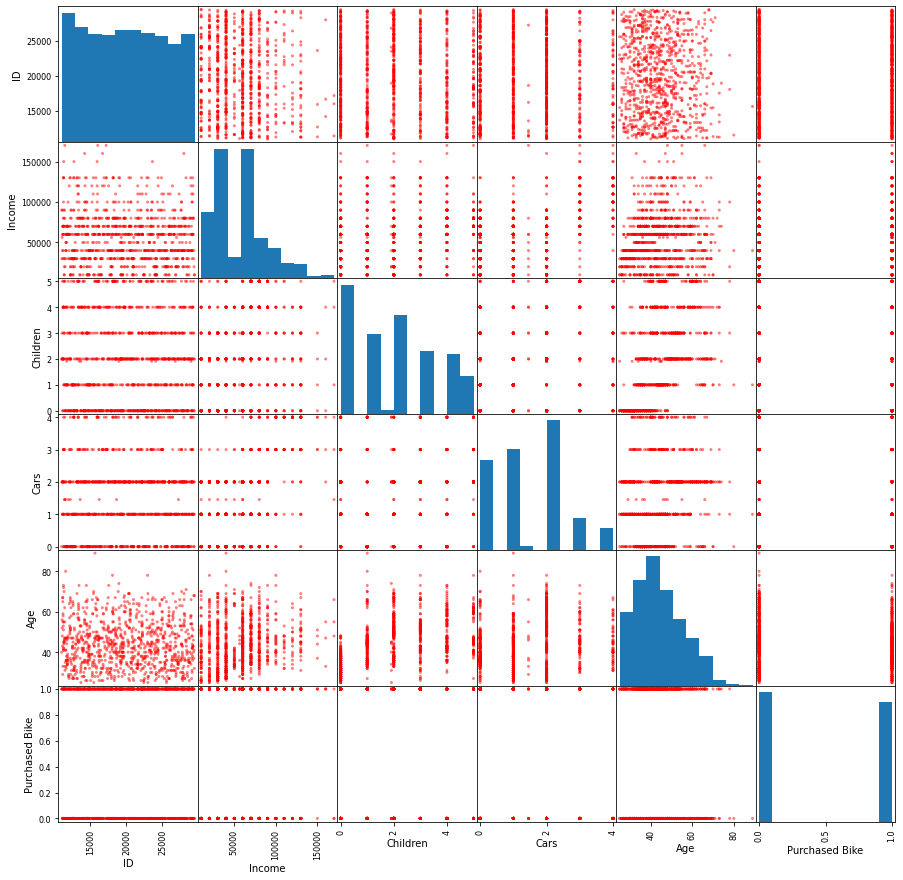

In [24]:
pd.plotting.scatter_matrix(data_c,figsize=(15,15),alpha=0.5,color='red')
plt.show()

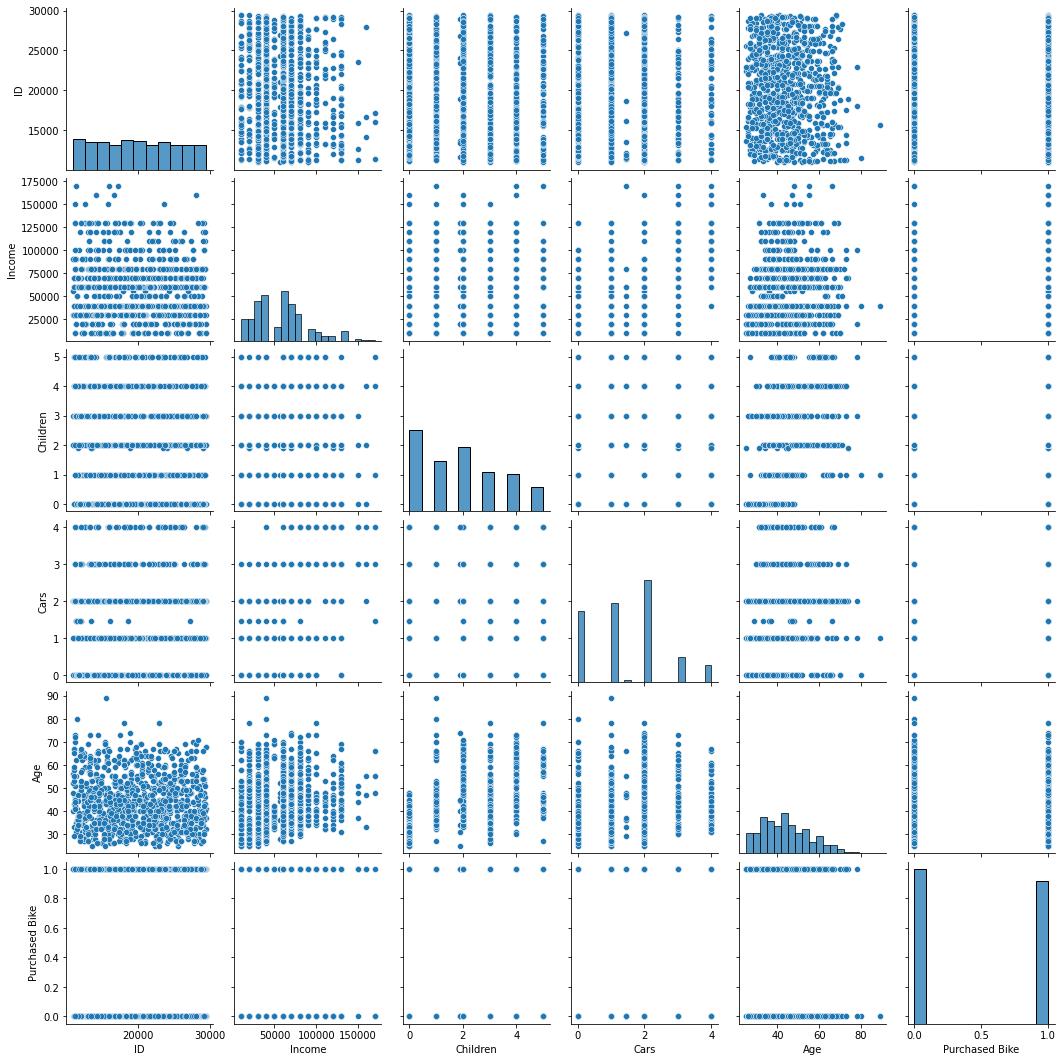

In [25]:
sns.pairplot(data_c)

In [26]:
# Split X & Y
X=data_c.iloc[:,:-1].drop('ID',axis=1)
Y=data_c.iloc[:,-1]


In [27]:
X.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0
1,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0
2,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0
3,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0
4,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0


In [28]:
Y

0      0
1      0
2      0
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    1
Name: Purchased Bike, Length: 1000, dtype: int64

In [29]:
o=[]
for i in X.columns:
    if X[i].dtype=='object':
        o.append(i)

Xenc=pd.get_dummies(data_c,columns=o)

In [30]:
Xenc.head()

,ID,Income,Children,Cars,Age,Purchased Bike,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male,...,Home Owner_No,Home Owner_Yes,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_Europe,Region_North America,Region_Pacific
0,12496,40000.0,1.0,0.0,42.0,0,1,0,1,0,...,0,1,1,0,0,0,0,1,0,0
1,24107,30000.0,3.0,1.0,43.0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,0,0
2,14177,80000.0,5.0,2.0,60.0,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
3,24381,70000.0,0.0,1.0,41.0,1,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
4,25597,30000.0,0.0,0.0,36.0,1,0,1,0,1,...,1,0,1,0,0,0,0,1,0,0


In [31]:
Xenc.columns,len(Xenc.columns)

(Index(['ID', 'Income', 'Children', 'Cars', 'Age', 'Purchased Bike',
        'Marital Status_Married', 'Marital Status_Single', 'Gender_Female',
        'Gender_Male', 'Education_Bachelors', 'Education_Graduate Degree',
        'Education_High School', 'Education_Partial College',
        'Education_Partial High School', 'Occupation_Clerical',
        'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional',
        'Occupation_Skilled Manual', 'Home Owner_No', 'Home Owner_Yes',
        'Commute Distance_0-1 Miles', 'Commute Distance_1-2 Miles',
        'Commute Distance_10+ Miles', 'Commute Distance_2-5 Miles',
        'Commute Distance_5-10 Miles', 'Region_Europe', 'Region_North America',
        'Region_Pacific'],
       dtype='object'),
 30)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()
Xscl=scaler.fit_transform(Xenc)

In [34]:
Xscl.shape

(1000, 30)

# Model Training

# XGBoost

In [35]:
!pip install xgboost

In [36]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [37]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(Xscl, Y, test_size=test_size, random_state=seed)


In [38]:
# fit model no training data
model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [39]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [40]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [41]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


# Decision Tree

In [42]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [43]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [44]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    171
1    159
dtype: int64

In [45]:
y_test.value_counts()

0    171
1    159
Name: Purchased Bike, dtype: int64

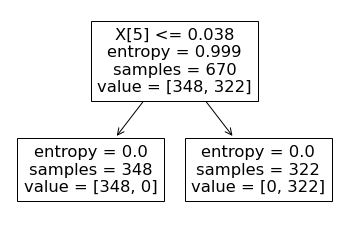

In [46]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

In [47]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Purchased Bike,,
0,171,0
1,0,159
